<a href="https://colab.research.google.com/github/chang-heekim/Kaggle_Competition/blob/main/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 48.4MB/s]


In [ ]:
!unzip /content/house-prices-advanced-regression-techniques.zip

Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Library 불러오기

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

# 데이터 전처리

In [ ]:
train_df = pd.read_csv('/content/train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- SalePrice와 관계가 높은 14개의 변수를 추출해 새로운 데이터 프레임 생성

In [ ]:
corr = train_df.corr()
corr['SalePrice'].sort_values(ascending=False).head(14)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
Name: SalePrice, dtype: float64

In [ ]:
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
           'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 
           'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces']

In [ ]:
train_new_df = train_df[columns]
train_new_df

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces
0,208500,7,1710,2,548,856,856,2,8,2003,2003,2003.0,196.0,0
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,1976.0,0.0,1
2,223500,7,1786,2,608,920,920,2,6,2001,2002,2001.0,162.0,1
3,140000,7,1717,3,642,756,961,1,7,1915,1970,1998.0,0.0,1
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,2000.0,350.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,2000,1999.0,0.0,1
1456,210000,6,2073,2,500,1542,2073,2,7,1978,1988,1978.0,119.0,2
1457,266500,7,2340,1,252,1152,1188,2,9,1941,2006,1941.0,0.0,2
1458,142125,5,1078,1,240,1078,1078,1,5,1950,1996,1950.0,0.0,0


- 데이터 프레임의 NaN값을 평균값을 대체함

In [ ]:
train_new_df.isnull().sum()

SalePrice        0
OverallQual      0
GrLivArea        0
GarageCars       0
GarageArea       0
TotalBsmtSF      0
1stFlrSF         0
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
MasVnrArea       8
Fireplaces       0
dtype: int64

In [ ]:
train_new_df = train_new_df.fillna(train_new_df.mean())

In [ ]:
train_new_df.isnull().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
MasVnrArea      0
Fireplaces      0
dtype: int64

- Target(SalePrice)의 분포

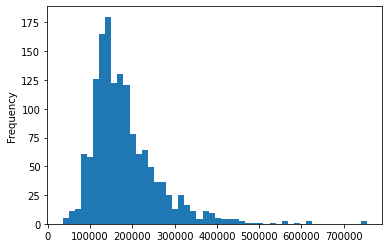

In [ ]:
train_new_df.SalePrice.plot.hist(bins=50)
plt.show()

# 데이터 분할 

In [ ]:
y = train_new_df.SalePrice
x = train_new_df.drop(['SalePrice'], axis=1)

train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=0.2)

In [ ]:
train_x.shape, val_x.shape, train_y.shape, val_y.shape

((1168, 13), (292, 13), (1168,), (292,))

# 모델 생성 및 학습

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 32)                448       
                                                                 
 dense_31 (Dense)            (None, 64)                2112      
                                                                 
 dense_32 (Dense)            (None, 128)               8320      
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 21,249
Trainable params: 21,249
Non-trai

In [ ]:
hist = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=5)

Epoch 1/5
37/37 [==============================] - 1s 15ms/step - loss: 11932696576.0000 - val_loss: 3593072128.0000
Epoch 2/5
37/37 [==============================] - 0s 6ms/step - loss: 3252957184.0000 - val_loss: 2955759616.0000
Epoch 3/5
37/37 [==============================] - 0s 7ms/step - loss: 2641568768.0000 - val_loss: 2677847808.0000
Epoch 4/5
37/37 [==============================] - 0s 6ms/step - loss: 2987597568.0000 - val_loss: 2600814848.0000
Epoch 5/5
37/37 [==============================] - 0s 6ms/step - loss: 2766494720.0000 - val_loss: 2664903936.0000


# r2 score 측정

In [ ]:
preds = model.predict(val_x)
metrics.r2_score(val_y, preds)

0.6027554917508195

# Test Data 전처리

In [ ]:
test_df = pd.read_csv('/content/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
           'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 
           'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces']

test_new_df = test_df[columns]
test_new_df

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961,1961.0,0.0,0
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,1958.0,108.0,0
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998,1997.0,0.0,1
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998,1998.0,20.0,1
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,1992.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,0.0,0.0,546.0,546,1,5,1970,1970,NaN,0.0,0
1455,4,1092,1.0,286.0,546.0,546,1,6,1970,1970,1970.0,0.0,0
1456,5,1224,2.0,576.0,1224.0,1224,1,7,1960,1996,1960.0,0.0,1
1457,5,970,0.0,0.0,912.0,970,1,6,1992,1992,NaN,0.0,0


In [ ]:
test_new_df.isnull().sum()

OverallQual      0
GrLivArea        0
GarageCars       1
GarageArea       1
TotalBsmtSF      1
1stFlrSF         0
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
GarageYrBlt     78
MasVnrArea      15
Fireplaces       0
dtype: int64

In [ ]:
test_new_df = test_new_df.fillna(test_new_df.mean())

In [ ]:
test_new_df.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
MasVnrArea      0
Fireplaces      0
dtype: int64

# Test Data 예측 및 저장

In [ ]:
test_x = test_new_df.to_numpy()
preds = model.predict(test_x)
preds = pd.Series(preds.squeeze(1), name='SalePrice')
preds

0       156972.968750
1       201083.046875
2       186233.656250
3       185966.812500
4       195454.812500
            ...      
1454    107833.875000
1455    120002.742188
1456    192229.937500
1457    126044.289062
1458    228851.562500
Name: SalePrice, Length: 1459, dtype: float32

In [ ]:
sub = pd.read_csv('/content/sample_submission.csv')
sub = sub.drop(['SalePrice'], axis=1)
sub.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [ ]:
submission = pd.DataFrame({'Id' : sub['Id'], 'SalePrice' : preds})
submission.to_csv('submission.csv', index=False)